<a href="https://colab.research.google.com/github/yasanga/My-ML-Journy/blob/main/SVM_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [6]:
iris.data_module # provides the name of the dataset.

'sklearn.datasets.data'

In [7]:
iris.feature_names # attributes of the dataset. Naturally these become our independe variables

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target_names # dependent variable classes. in Iris, we are going to do a categorical segementation.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
iris.target # numerical representations of the categories. There are 03 categories. Each category is represented via a numrical flag variable from 0-2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
df = pd.DataFrame(iris.data,columns=iris.feature_names) # with the help of panda`s let`s read the dataset\n

In [22]:
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
df['target'] = iris.target # additional aliase field is added as target to enhance the comprehension of the dataset\n",
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
df[df.target==1].head() # display only the atrreibutes of the versicolor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [25]:
df[df.target==0].head() # display only the atrreibutes of the sethosa

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])# via this lambda expression, numerical target`s have been expressed via their textual names for the clarity.\n",
# extract target flag via df.target command into the variable x, then loop it through the target names array and derive the mataching text name and assign it to a alialse field\n",
#created as flower_name\n",
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [27]:
# dataset is segmented to into 03 different subsets, containing each flower category.\n",
df0 = df[:50] # sethosa\n",
df1 = df[50:100] # versicolor\n",
df2 = df[100:] # virginica

In [28]:
import matplotlib.pyplot as plt # plot in the 2D distribution\n",
        # immediatly draw after the execution\n",
%matplotlib inline

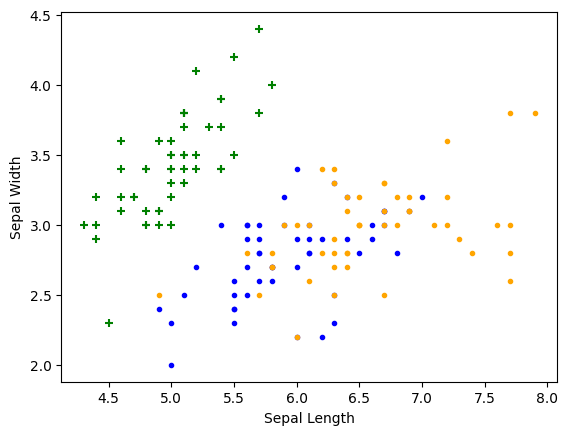

In [29]:
# Plot configuration in the 2D space
plt.xlabel('Sepal Length', color='black')  # Add missing comma and specify color
plt.ylabel('Sepal Width', color='black')  # Add missing comma and specify color

# Scatter plot for each dataframe
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="green", marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue", marker='.')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color="orange", marker='.')

# Show the plot
plt.show()

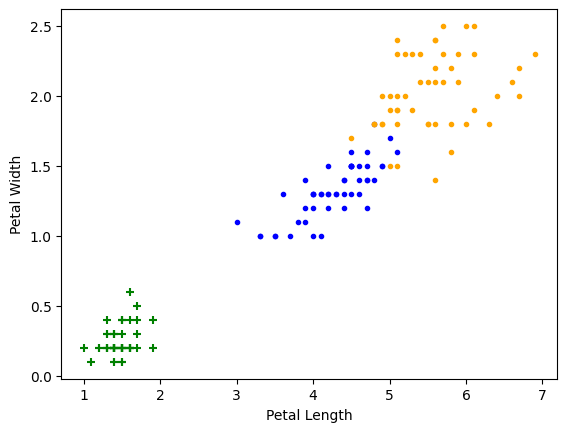

In [30]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green", marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue", marker='.')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="orange", marker='.')

# Show the plot
plt.show()

In [31]:
X = df.drop(['target', 'flower_name'], axis='columns')  # Add missing comma
y = df.target

print(X)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # divide 20% of the dataset for the testing\n",
len(X_train)

120

In [33]:
len(X_test)

30

In [34]:
from sklearn.svm import SVC
model = SVC()

In [35]:
model.fit(X_train, y_train)

SVC()

In [36]:
model.score(X_test, y_test)

0.9666666666666667

In [43]:
model.predict([[2,3.0,1.5,0.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [38]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [40]:
model_C = SVC(C=10) # adjustments to the regularization
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [41]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9

In [42]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)

0.9666666666666667